In [1]:
import keras
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline

Using TensorFlow backend.


In [2]:
from vis.visualization import visualize_saliency, visualize_cam
from vis.utils import utils
from keras import activations
from keras.applications.nasnet import NASNetMobile

In [4]:
model = NASNetMobile(input_shape=(224,224,3))

24240128/24226656 [==============================] - 7s 0us/step


In [5]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 111, 111, 32) 128         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 111, 111, 32) 0           stem_bn1[0][0]                   
__________________________________________________________________________________________________
reduction_

In [23]:
layer_idx = utils.find_layer_idx(model, 'predictions')
model.layers[layer_idx].activation = activations.linear

/home/met/ug/16144001/miniconda3/envs/venv1/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


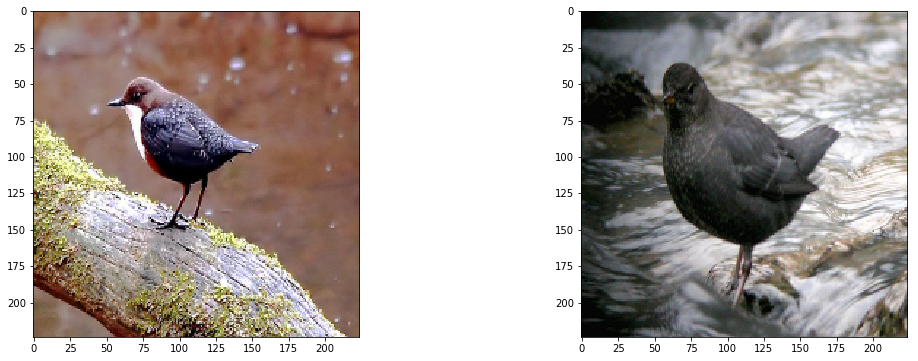

In [9]:
plt.rcParams['figure.figsize'] = (18, 6)

img1 = utils.load_img('ouzel1.jpg', target_size=(224, 224))
img2 = utils.load_img('ouzel2.jpg', target_size=(224, 224))

f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)

In [6]:
img1.shape

(331, 331, 3)

# NASNetLarge Saliency

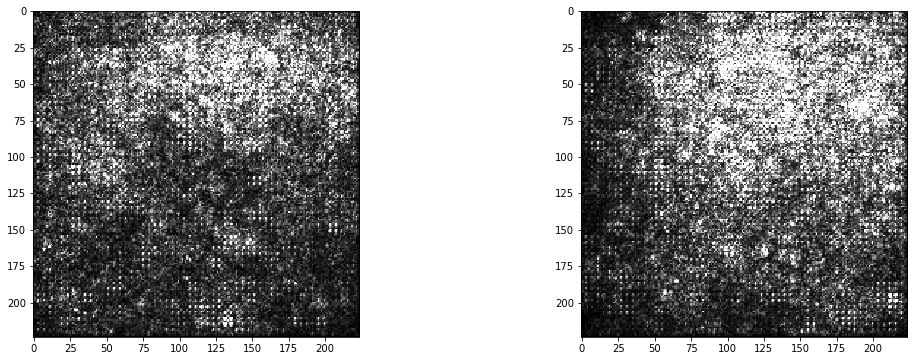

In [25]:
plt.figure()
f, ax = plt.subplots(1, 2)
for i, img in enumerate([img1, img2]):    
    # 20 is the imagenet index corresponding to `ouzel`
#     ind = np.argmax(model.predict(img.reshape(1, 331, 331, 3)), axis=-1)
    grads = visualize_saliency(model, layer_idx, filter_indices=821, 
                               seed_input=img)
    # Lets overlay the heatmap onto original image.   
    # In the paper they took maximum value of gradient across channels for each pixel
    ax[i].imshow(np.max(grads, axis=-1), cmap='gray')

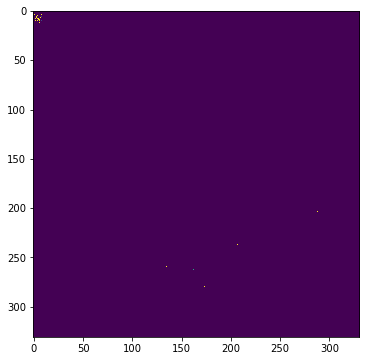

In [14]:
h = np.max(grads, axis=-1)
plt.imshow(h.clip(242,255))

In [21]:
np.argmax(model.predict(img2.reshape(1, 224, 224, 3)), axis=-1)

array([821])

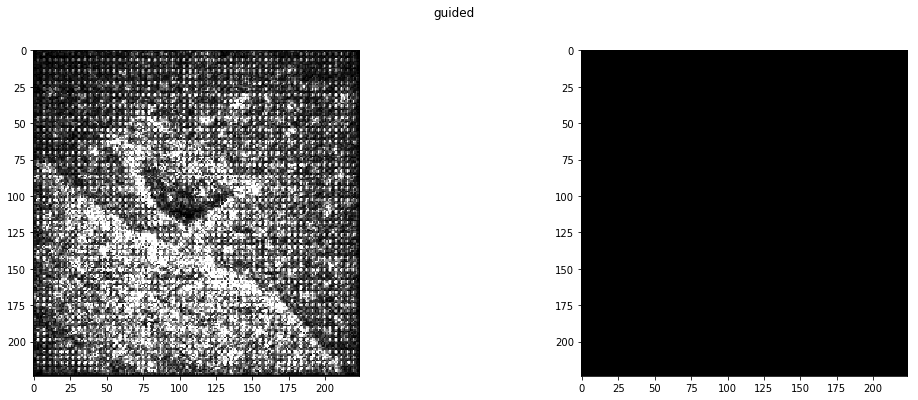

In [26]:
for modifier in ['guided']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle(modifier)
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
#         ind = np.argmax(model.predict(img.reshape(1, 331, 331, 3)), axis=-1)
        grads = visualize_saliency(model, layer_idx, filter_indices=821, 
                                   seed_input=img, backprop_modifier=modifier)
        # Lets overlay the heatmap onto original image.   
        # In the paper they took maximum value of gradient across channels for each pixel
        ax[i].imshow(np.max(grads, axis=-1), cmap='gray')

In [16]:
h = np.max(grads, axis=-1)

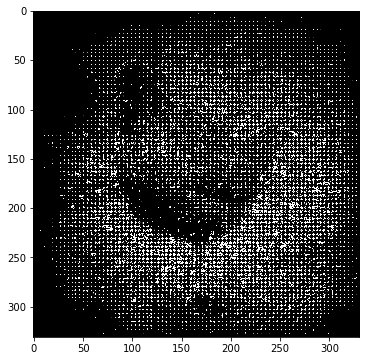

In [23]:
plt.imshow(h.clip(242,255), cmap='gray')

# NASNet grad-CAM

In [6]:
layer_idx = utils.find_layer_idx(model, 'predictions')

In [15]:
pen_layer_idx = utils.find_layer_idx(model, 'activation_36')

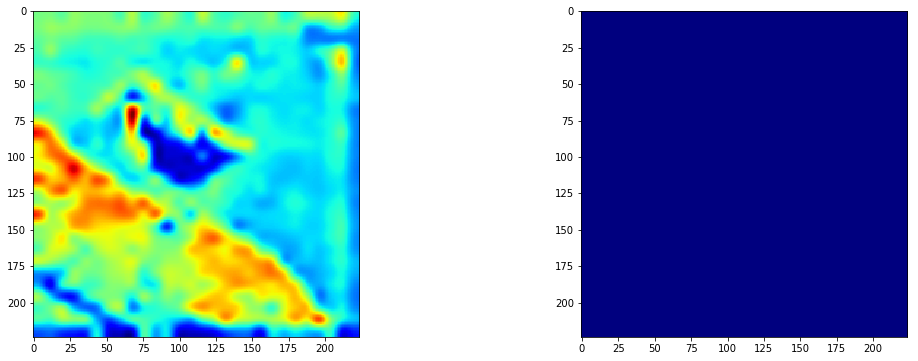

In [27]:
plt.figure()
f, ax = plt.subplots(1, 2)
for i, img in enumerate([img1, img2]):    
    # 20 is the imagenet index corresponding to `ouzel`
#     ind = np.argmax(model.predict(img.reshape(1, 331, 331, 3)), axis=-1)
    grads = visualize_cam(model, layer_idx, filter_indices=821,
                               seed_input=img, penultimate_layer_idx=pen_layer_idx, backprop_modifier='guided')
    # Lets overlay the heatmap onto original image.   
    # In the paper they took maximum value of gradient across channels for each pixel
    ax[i].imshow(grads)

In [11]:
grads.shape

(224, 224, 3)

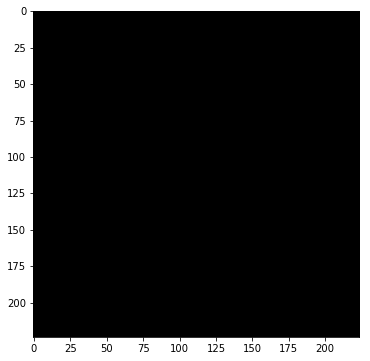

In [14]:
plt.imshow(np.max(grads, axis=-1).clip(0,255), cmap='gray')